## Multivariate Gaussain distribution

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

sns.set()

In [15]:
def confident_ellipse(X):
    # Calculate the eigenvectors and eigenvalues
    covariance = np.cov(X.T)
    eigenval,eigenvec = np.linalg.eig(covariance);

    # Get the index of the largest eigenvector and the largest eigenvalue
    large_eigen_ind = np.argmax(eigenval);
    large_eigenvec = eigenvec[:, large_eigen_ind];
    large_eigenval = eigenval[large_eigen_ind];

    small_eigen_ind = np.argmin(eigenval);
    small_eigenvec = eigenvec[:, small_eigen_ind];
    small_eigenval = eigenval[small_eigen_ind];

    angle = np.arctan2(large_eigenvec[1], large_eigenvec[0]);
    if angle < 0:
        angle = angle + 2*np.pi;

    avg = np.mean(X,axis=0);

    chisquare_val = 2.4477;
    theta_grid = np.linspace(0,2*np.pi);
    
    #if large_eigenval <= 0:
    #    large_eigenval = 1e-8
        
    #if small_eigenval <= 0:
    #    small_eigenval = 1e-8
        
    a = chisquare_val*np.sqrt(large_eigenval);
    b = chisquare_val*np.sqrt(small_eigenval);

    # the ellipse in x and y coordinates 
    ellipse_x  = a*np.cos(theta_grid);
    ellipse_y  = b*np.sin(theta_grid);

    ellipse_coor = np.vstack((ellipse_x,ellipse_y))
    #Define a rotation matrix
    R = np.array([[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]);

    #let's rotate the ellipse to some angle phi
    ellipse_coor = np.dot(ellipse_coor.T,R);
    
    ellipse_coor[:,0] += avg[0]
    ellipse_coor[:,1] += avg[1]
    
    return ellipse_coor

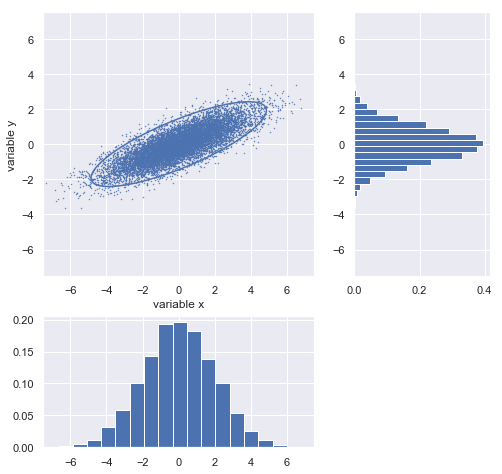

In [11]:
x_mean = np.array([[0],[0]])
x_cov  = np.array([[4,1.6],[1.6,1]])

X = np.random.multivariate_normal(x_mean.flatten(),x_cov,10000)

X_ellipse = confident_ellipse(X)

x1 = X[:,0]
x2 = X[:,1]

plt.figure(figsize=(8,8))
gs = GridSpec(2,2,width_ratios=[2,1],height_ratios=[2,1])
plt.subplot(gs[0])
plt.scatter(x1,x2,s=0.2)
plt.plot(X_ellipse[:,0],X_ellipse[:,1])
plt.xlim([-7.5,7.5])
plt.ylim([-7.5,7.5])
plt.ylabel('variable y')
plt.xlabel('variable x')

plt.subplot(gs[1])
plt.hist(x2,bins=20,orientation='horizontal',density=True)
plt.ylim([-7.5,7.5])

plt.subplot(gs[2])
plt.hist(x1,bins=20,density=True)
plt.xlim([-7.5,7.5])

plt.show()
#plt.savefig('/Users/xxue/Desktop/multivariate_gaussian.pdf', dpi=300, format='pdf', bbox_inches='tight')

## Random sampling and sigma points

In [46]:
beta = 2
kappa = 0
alpha = 1 # (1e-4 ~ 1)

L = 2
lambd = alpha**2*(L + kappa) - L
c = np.sqrt(L+lambd)

x_std = np.linalg.cholesky(x_cov)
X_sigma = np.hstack((x_mean,x_mean + c*x_std,x_mean - c*x_std )).T
X_sigma_ellipse = confident_ellipse(X_sigma)

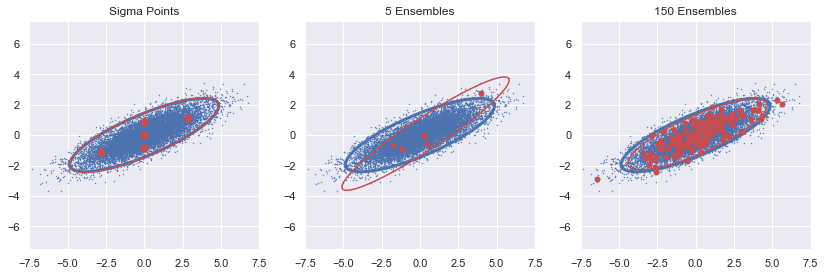

In [53]:
plt.figure(figsize=(14,4.2))
plt.subplot(1,3,1)
plt.scatter(x1,x2,s=0.2)
plt.plot(X_ellipse[:,0],X_ellipse[:,1],linewidth=3)

plt.plot(X_sigma[:,0],X_sigma[:,1],'r.',markersize=15)
plt.plot(X_sigma_ellipse[:,0],X_sigma_ellipse[:,1],'r-')
plt.xlim([-7.5,7.5])
plt.ylim([-7.5,7.5])
plt.title('Sigma Points')

N = [5,150]
for i in range(2):
    plt.subplot(1,3,i+2)
    plt.scatter(x1,x2,s=0.2)
    plt.plot(X_ellipse[:,0],X_ellipse[:,1],linewidth=3)
    
    #np.random.seed(10)
    X_ensembles = np.random.multivariate_normal(x_mean.flatten(),x_cov,N[i])
    X_ensembles_ellipse = confident_ellipse(X_ensembles)
    
    plt.plot(X_ensembles[:,0],X_ensembles[:,1],'r.',markersize=10)
    plt.plot(X_ensembles_ellipse[:,0],X_ensembles_ellipse[:,1],'r-')
    
    plt.xlim([-7.5,7.5])
    plt.ylim([-7.5,7.5])
    
    plt.title('{} Ensembles'.format(N[i]))
plt.show()
#plt.savefig('/Users/xxue/Desktop/sampling.pdf', dpi=300, format='pdf', bbox_inches='tight')